<a href="https://colab.research.google.com/github/ExplorerGumel/Weather_images_classification/blob/main/Weather_images_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import string
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img



In [2]:
# set seed
seed = 42

def seed_everything(seed):
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    
seed_everything(seed)

In [3]:
base_dir = '//content/drive/MyDrive/weather_test'

cloudy = os.path.join(base_dir, 'cloudy')
desert = os.path.join(base_dir, 'desert')
green = os.path.join(base_dir, 'green_area')
water = os.path.join(base_dir, 'water')

print('total  cloudy images:', len(os.listdir(cloudy)))
print('total  desert images:', len(os.listdir(desert)))
print('total  green images:', len(os.listdir(green)))
print('total  water images:', len(os.listdir(water)))


total  cloudy images: 450
total  desert images: 340
total  green images: 450
total  water images: 450


In [4]:
base = "/content/drive/MyDrive/"
print("\nContents of train directory:")
print(os.listdir(f"{base}/weather_train"))

print("\nContents of validation directory:")
print(os.listdir(f'{base}/weather_test'))


Contents of train directory:
['cloudy', 'desert', 'green_area', 'water']

Contents of validation directory:
['cloudy', 'desert', 'green_area', 'water']


In [5]:
train_dir = "/content/drive/MyDrive/weather_train"
val_dir = "/content/drive/MyDrive/weather_test"
train_cloudy_dir = os.path.join(train_dir, 'cloudy')
train_desert_dir = os.path.join(train_dir, 'desert')
train_green_dir = os.path.join(train_dir, 'green_area')
train_water_dir = os.path.join(train_dir, 'water')

val_cloudy_dir = os.path.join(val_dir, 'cloudy')
val_desert_dir = os.path.join(val_dir, 'desert')
val_green_dir = os.path.join(val_dir, 'green_area')
val_water_dir = os.path.join(val_dir, 'water')

In [6]:
train_cloudy_fnames = os.listdir( train_cloudy_dir )
train_desert_fnames = os.listdir( train_desert_dir )
train_green_fnames = os.listdir( train_green_dir )
train_water_fnames = os.listdir( train_water_dir )

print(train_cloudy_fnames[:10])
print(train_desert_fnames[:10])
print(train_green_fnames[:10])
print(train_water_fnames[:10])

['train_12724.jpg', 'train_27734.jpg', 'train_32828.jpg', 'train_37896.jpg', 'train_18281.jpg', 'train_7801.jpg', 'train_6829.jpg', 'train_24164.jpg', 'train_12975.jpg', 'train_5981.jpg']
['desert(480).jpg', 'desert(154).jpg', 'desert(677).jpg', 'desert(186).jpg', 'desert(901).jpg', 'desert(467).jpg', 'desert(1087).jpg', 'desert(170).jpg', 'desert(801).jpg', 'desert(670).jpg']
['Forest_2829.jpg', 'Forest_2130.jpg', 'Forest_2002.jpg', 'Forest_1861.jpg', 'Forest_2970.jpg', 'Forest_2040.jpg', 'Forest_6.jpg', 'Forest_1998.jpg', 'Forest_586.jpg', 'Forest_432.jpg']
['SeaLake_2900.jpg', 'SeaLake_347.jpg', 'SeaLake_333.jpg', 'SeaLake_1964.jpg', 'SeaLake_2772.jpg', 'SeaLake_1126.jpg', 'SeaLake_995.jpg', 'SeaLake_74.jpg', 'SeaLake_1982.jpg', 'SeaLake_180.jpg']


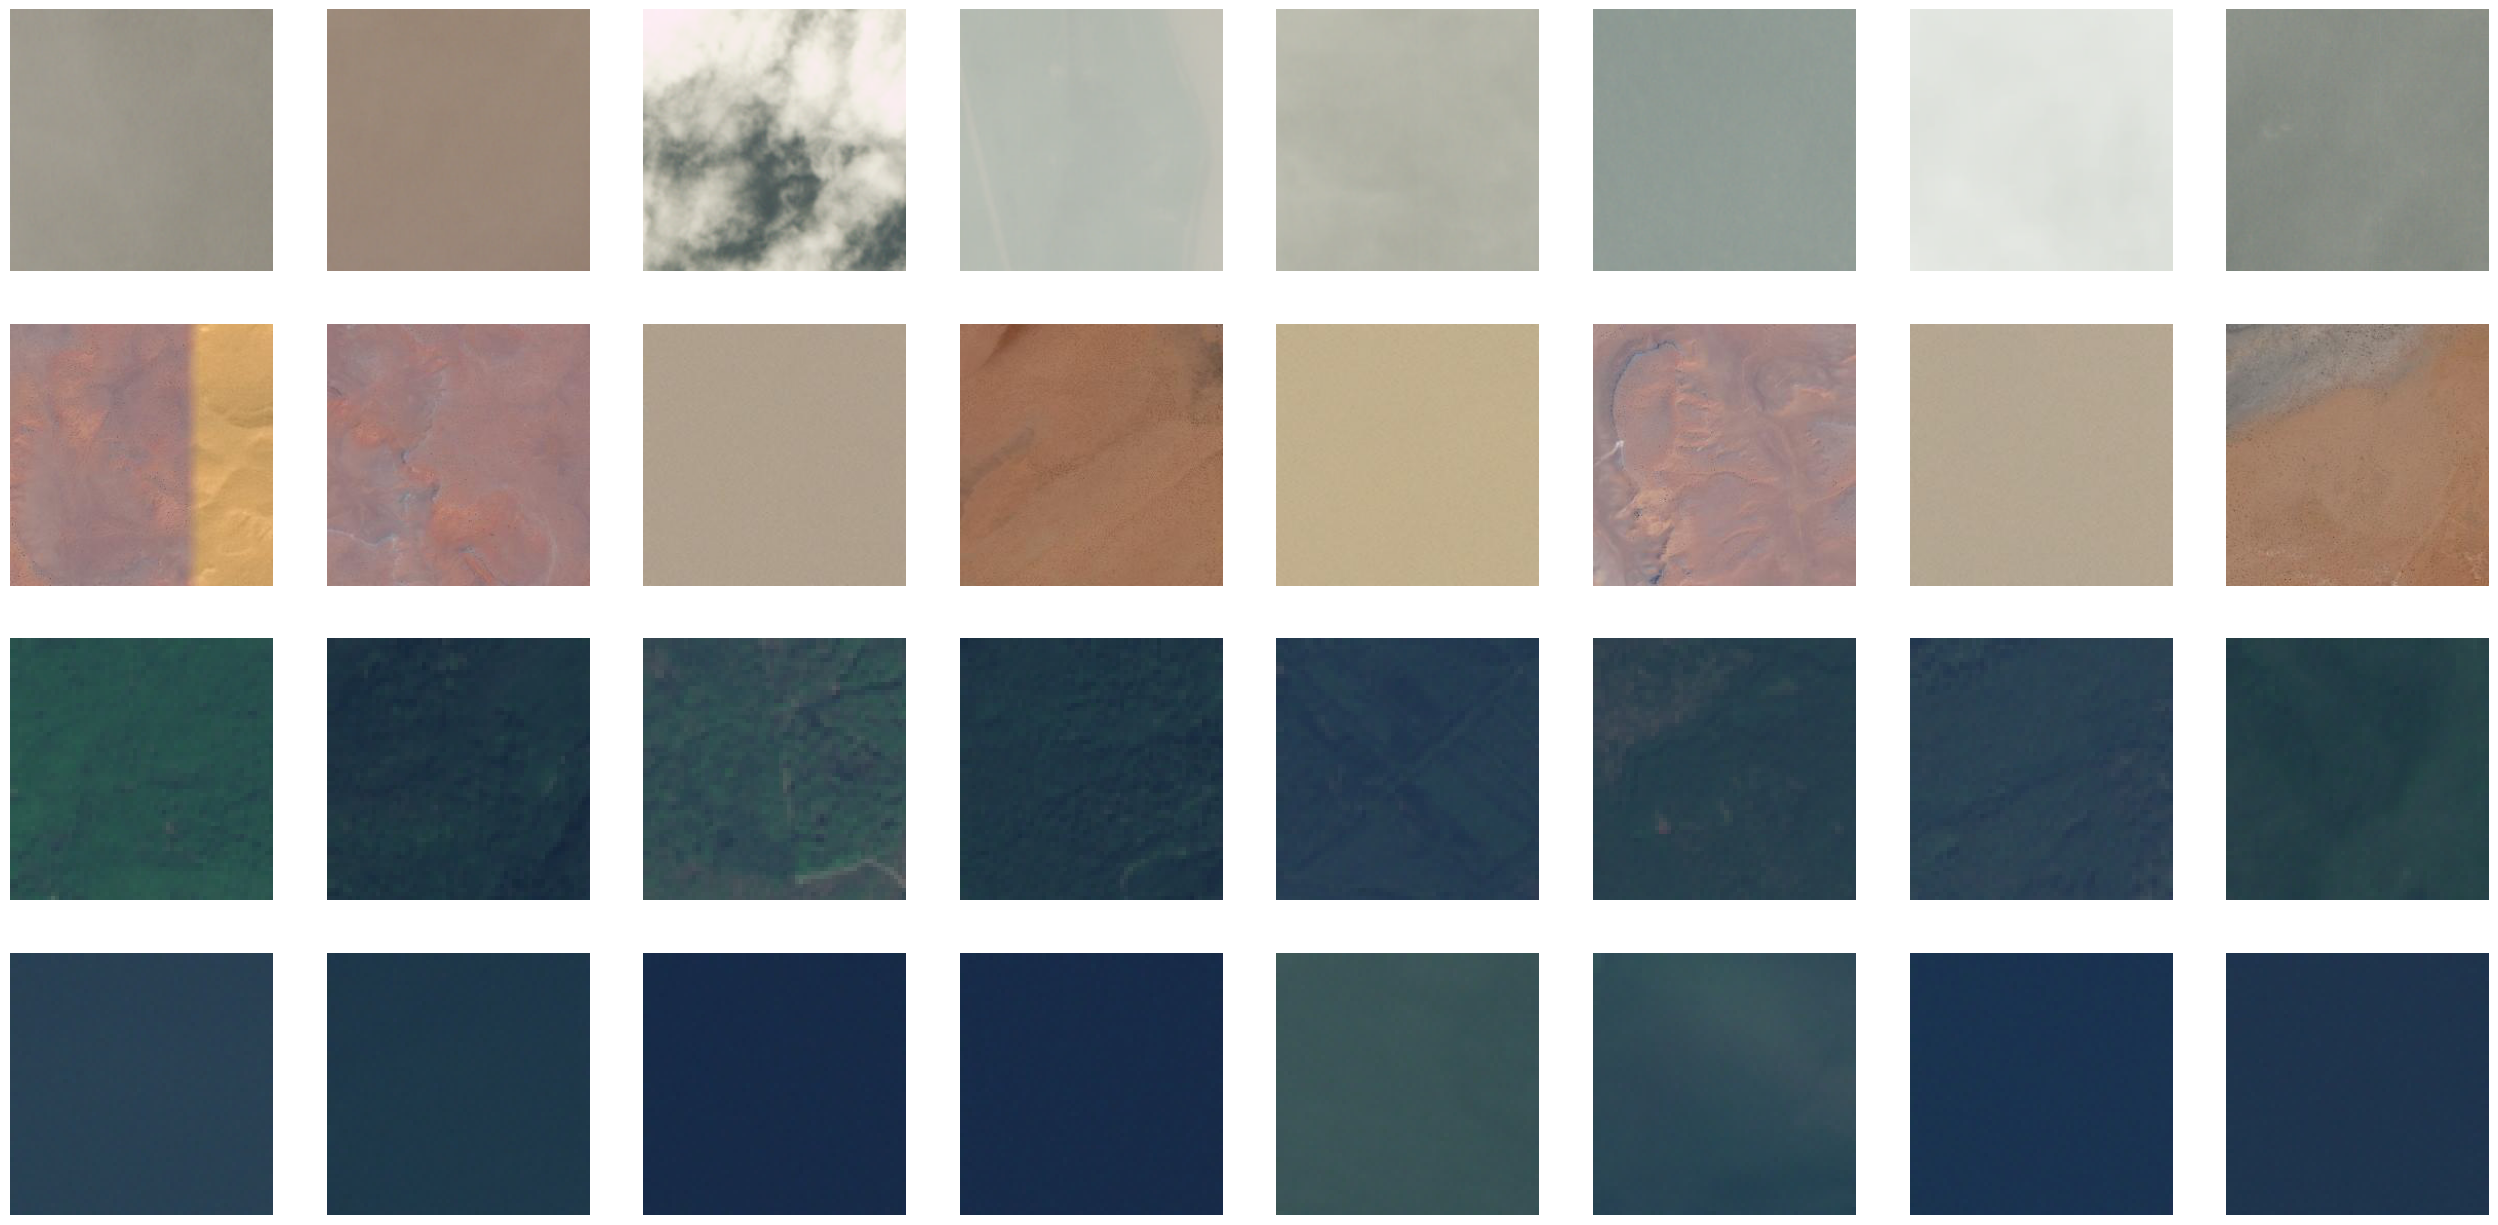

In [28]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 8
ncols = 8

pic_index = 

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cloudy_pix = [os.path.join(train_cloudy_dir, fname) 
                for fname in train_cloudy_fnames[ pic_index-8:pic_index] 
               ]

next_desert_pix = [os.path.join(train_desert_dir, fname) 
                for fname in train_desert_fnames[ pic_index-8:pic_index]
               ]
next_green_pix = [os.path.join(train_green_dir, fname) 
                for fname in train_green_fnames[ pic_index-8:pic_index]
               ]

next_water_pix = [os.path.join(train_water_dir, fname) 
                for fname in train_water_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cloudy_pix+next_desert_pix+next_green_pix+next_water_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') 

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [11]:
seed_everything(seed)
train_datagen = ImageDataGenerator(rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
       '/content/drive/MyDrive/weather_train',  
        target_size=(300, 300),
        batch_size=16,
        class_mode='categorical')

validation_datagen = ImageDataGenerator(rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
validation_generator = validation_datagen.flow_from_directory(
       '/content/drive/MyDrive/weather_test',  
        target_size=(300, 300),
        batch_size=16,
        class_mode='categorical')

Found 3941 images belonging to 4 classes.
Found 1690 images belonging to 4 classes.


In [12]:
seed_everything(seed)
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(300, 300, 3)),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Dense(16, activation=tf.nn.relu),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
                                    ])

In [14]:
seed_everything(seed)
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_generator,epochs=30,validation_data=validation_generator)

Epoch 1/30
247/247 [==============================] - 126s 501ms/step - loss: 0.3156 - accuracy: 0.8739 - val_loss: 0.2821 - val_accuracy: 0.8846
Epoch 2/30
247/247 [==============================] - 124s 504ms/step - loss: 0.3330 - accuracy: 0.8686 - val_loss: 0.3775 - val_accuracy: 0.8473
Epoch 3/30
247/247 [==============================] - 124s 505ms/step - loss: 0.3347 - accuracy: 0.8566 - val_loss: 0.5622 - val_accuracy: 0.7325
Epoch 4/30
247/247 [==============================] - 123s 500ms/step - loss: 0.3224 - accuracy: 0.8696 - val_loss: 0.6064 - val_accuracy: 0.7225
Epoch 5/30
247/247 [==============================] - 123s 500ms/step - loss: 0.3511 - accuracy: 0.8566 - val_loss: 8.8660 - val_accuracy: 0.4976
Epoch 6/30
247/247 [==============================] - 124s 502ms/step - loss: 0.3651 - accuracy: 0.8483 - val_loss: 0.4056 - val_accuracy: 0.8166
Epoch 7/30
247/247 [==============================] - 124s 502ms/step - loss: 0.3364 - accuracy: 0.8604 - val_loss: 0.2851 -

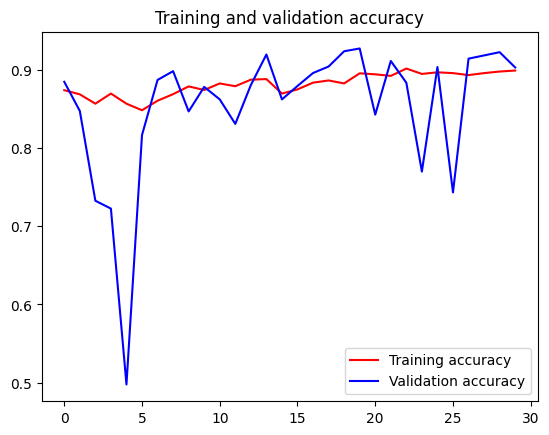

<Figure size 640x480 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()
